<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/MLAssignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper Referred:

Mall Customer Segmentation Using K-Means Clustering Authors: Ashwani, Gurleen Kaur, Lekha Bhambhu Published: December 2023 in Proceedings of Data Analytics and Management (pp. 459–474) researchgate.net

**Research Gap:** Papers often fix number of clusters (k) without evaluation metrics.

**Improvement Idea:** Tune optimal k using Silhouette Score, Elbow method, and standardize features.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())
print(df.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
print("\nDataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Dataset Shape: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Step 4: Data Preprocessing
# Encode 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Select numeric features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

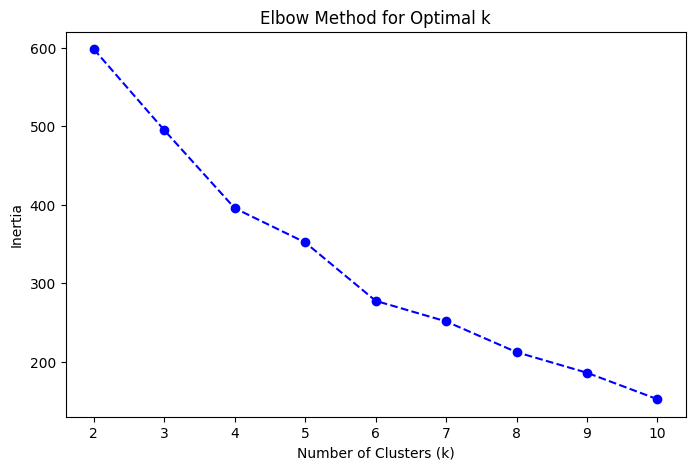

In [5]:
# Step 5: Find Optimal K using Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

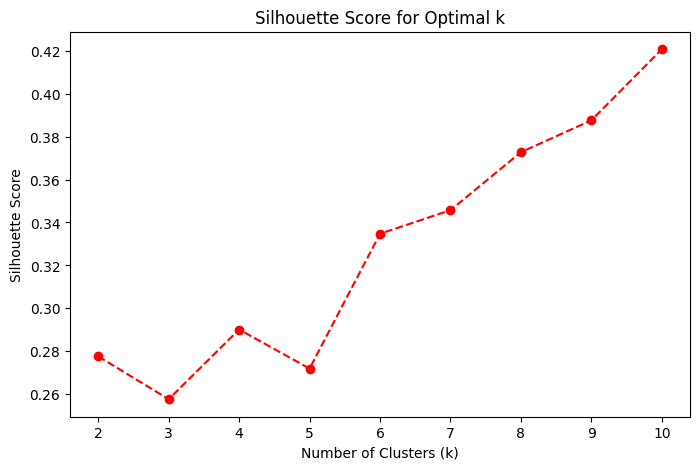


 Optimal number of clusters (based on Silhouette Score): 10


In [6]:
# Step 6: Evaluate using Silhouette Score
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n Optimal number of clusters (based on Silhouette Score): {optimal_k}")


In [7]:
# Step 7: Build Tuned K-Means Model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

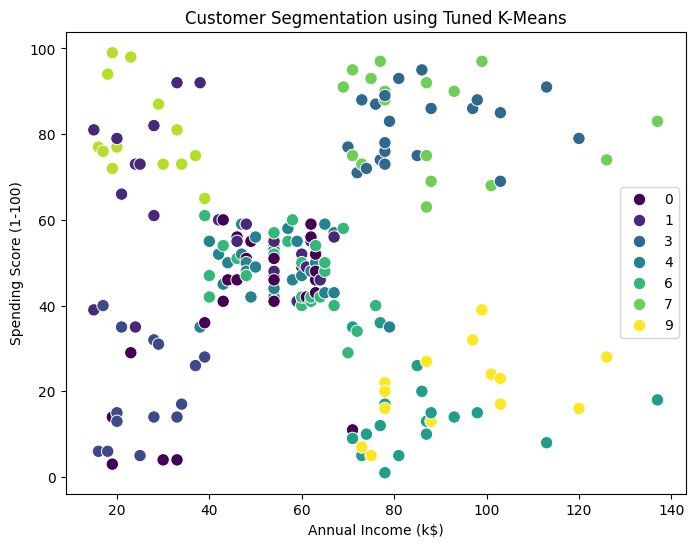

In [8]:
# Step 8: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=80
)
plt.title('Customer Segmentation using Tuned K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        58.846154           48.692308               39.846154
1        25.250000           41.250000               60.916667
2        41.214286           26.071429               20.142857
3        32.190476           86.047619               81.666667
4        54.153846           54.230769               48.961538
5        38.473684           85.894737               14.210526
6        27.960000           57.360000               47.120000
7        33.277778           87.111111               82.666667
8        25.461538           25.692308               80.538462
9        43.785714           93.285714               20.642857


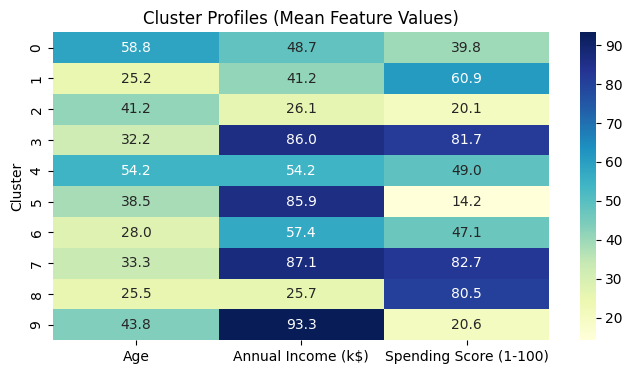

In [9]:

# Step 9: Cluster Analysis
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary:\n", cluster_summary)

# Step 10: Visualize Cluster Profiles
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cluster Profiles (Mean Feature Values)")
plt.show()